In [ ]:
import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense,Dropout

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV,KFold,cross_val_score,train_test_split
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import mean_squared_error

In [ ]:
data = pd.read_csv('/content/gas_turbines.csv')
data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [ ]:
data.shape

(15039, 11)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [ ]:
data.describe(include='all')

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [ ]:
data.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

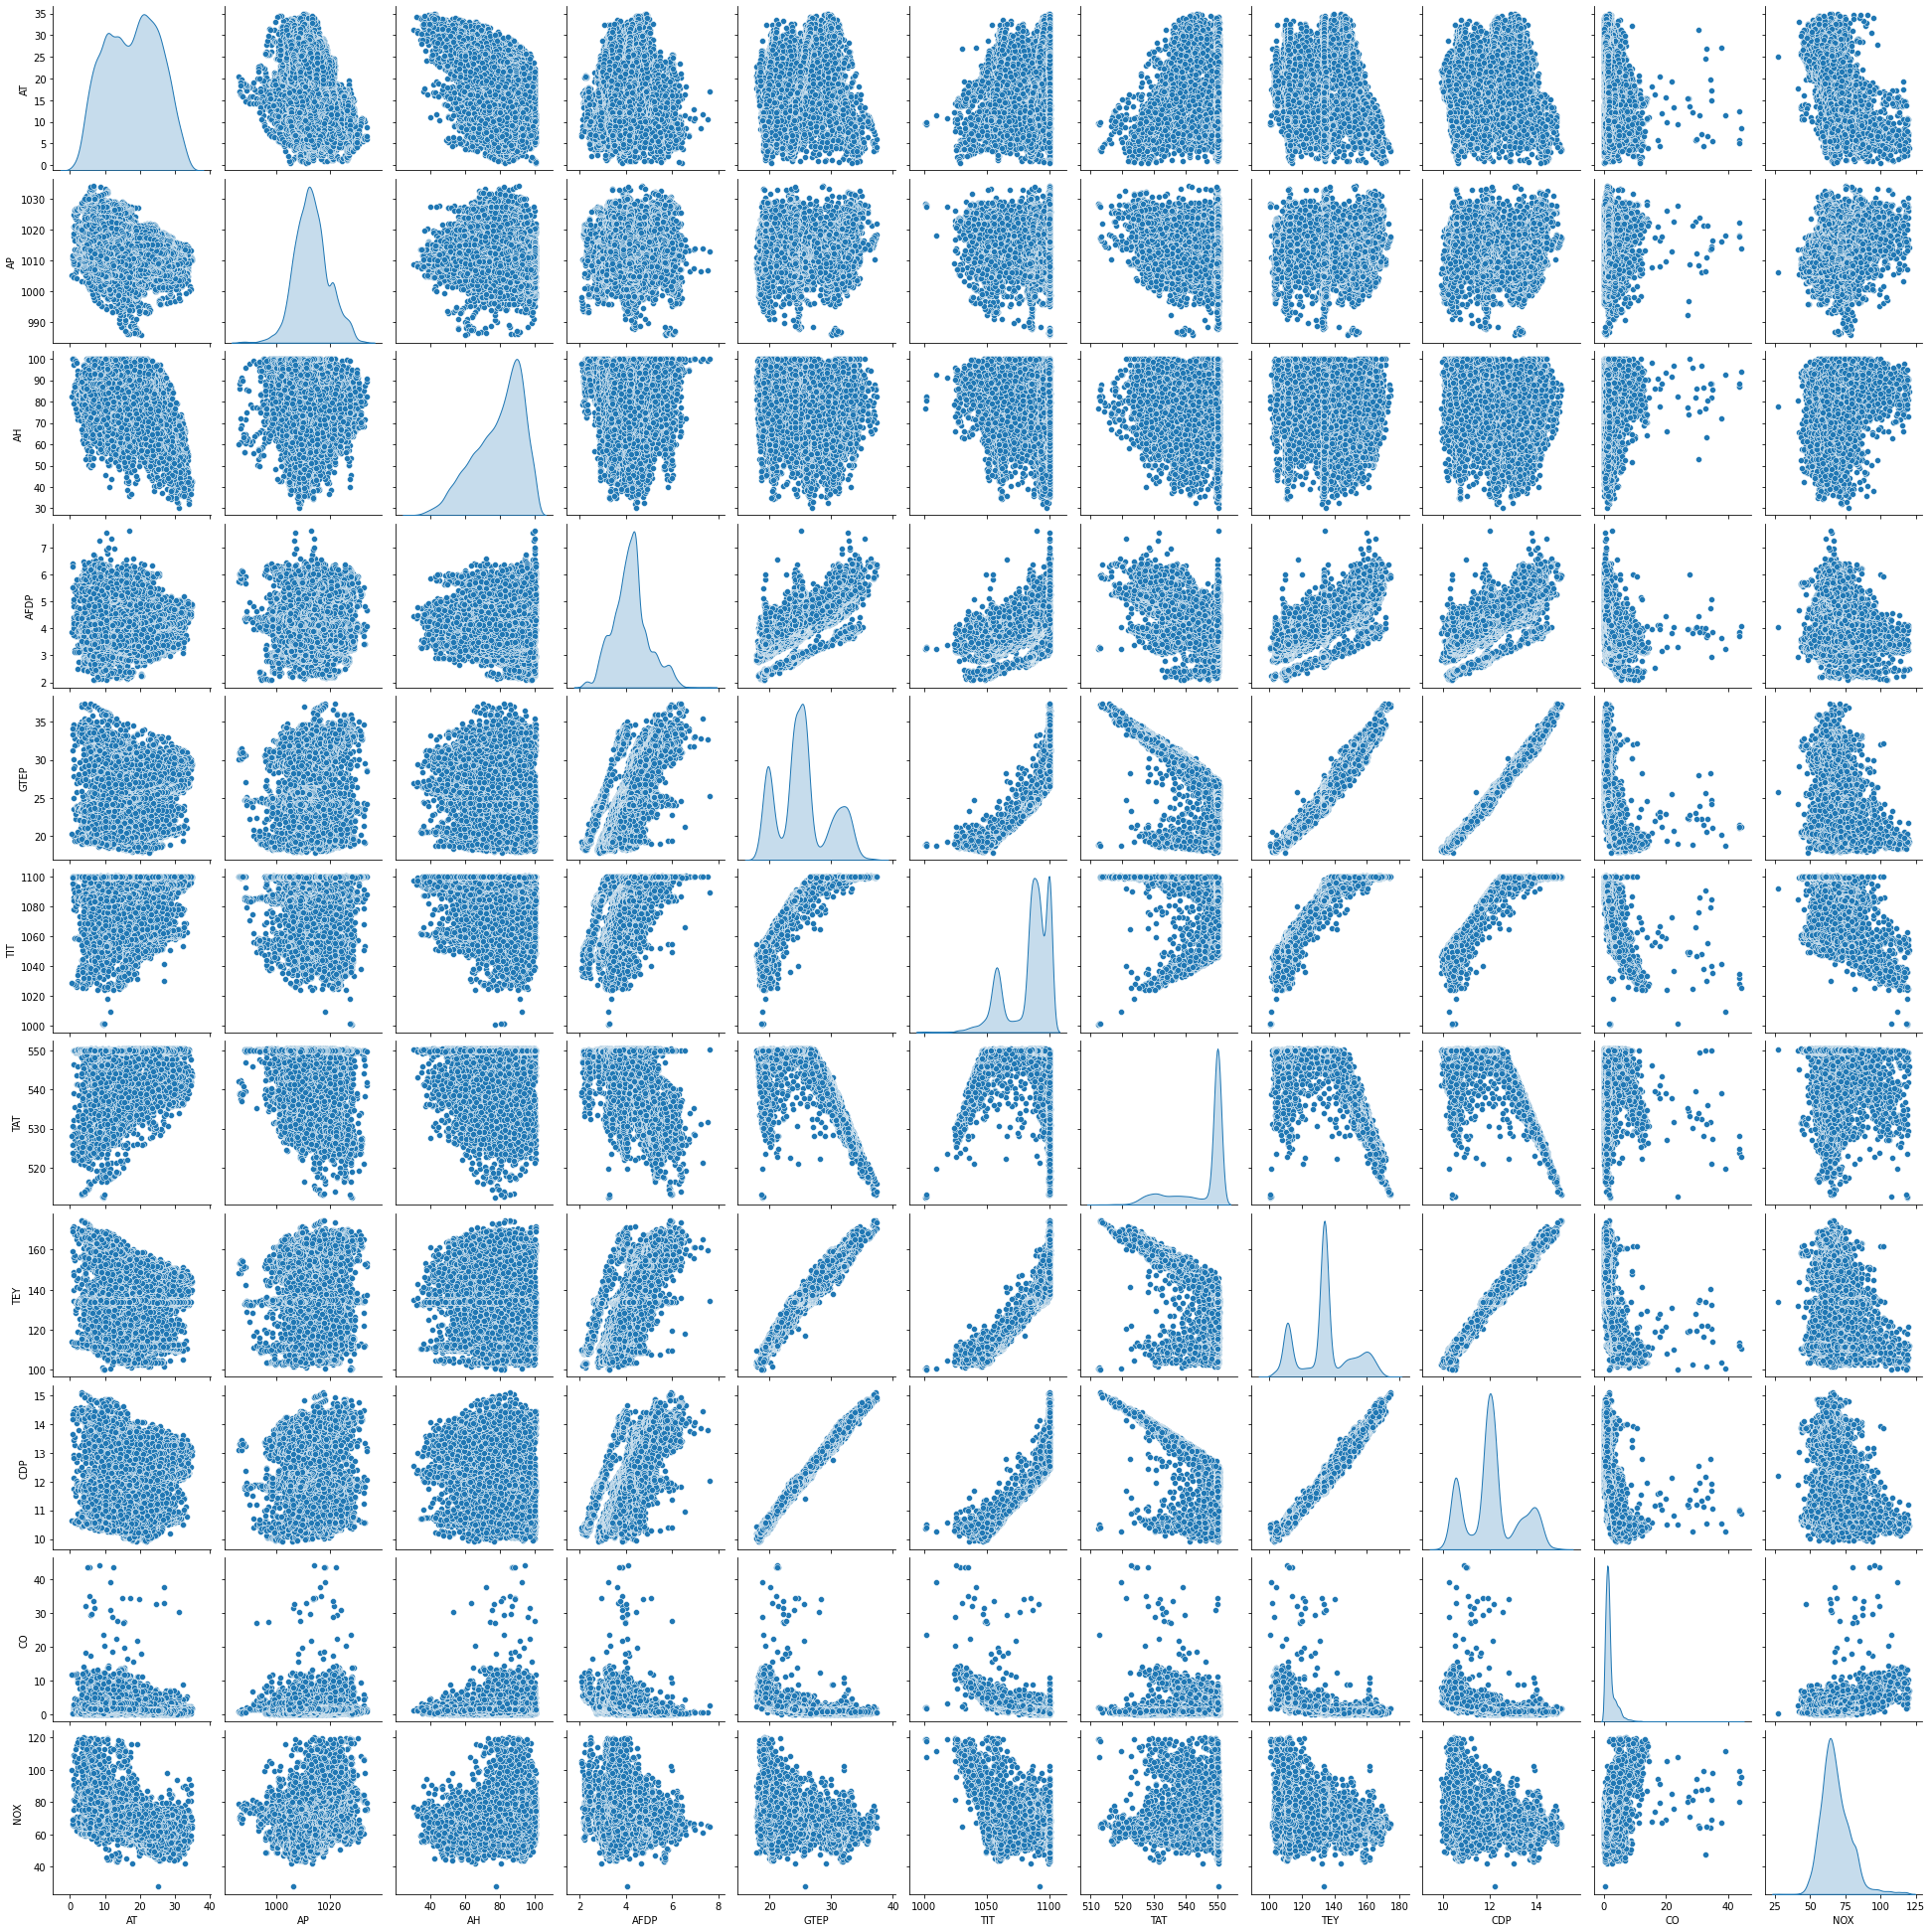

In [ ]:
sns.pairplot(data,diag_kind='kde')

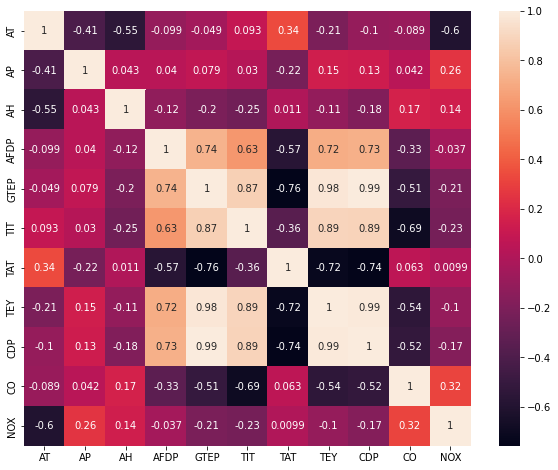

In [ ]:
corr_matrix = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True)
plt.show()

In [ ]:
x = data.drop('TEY',axis=1)

y = data[['TEY']]

In [ ]:
scale = MinMaxScaler()
std = scale.fit_transform(x)
x_std = pd.DataFrame(std,columns=x.columns)

In [ ]:
x_std.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,0.184182,0.456050,0.951314,0.255758,0.091426,0.584,0.984015,0.135340,0.071522,0.596548
1,0.182020,0.466391,0.955881,0.255721,0.094755,0.585,0.984015,0.133988,0.073372,0.597134
2,0.185295,0.474664,0.939003,0.252571,0.097367,0.586,0.980608,0.134567,0.072576,0.593791
3,0.189922,0.482937,0.929126,0.252227,0.098033,0.588,0.983753,0.135533,0.072375,0.595984
4,0.199830,0.493278,0.927708,0.255323,0.096650,0.589,0.983491,0.136692,0.073647,0.592087


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_std,y,test_size=.20)

In [ ]:
ann = Sequential()
ann.add(Dense(10, input_dim=10, kernel_initializer='he_uniform', activation='tanh'))
ann.add(Dense(6,kernel_initializer='he_uniform', activation='tanh'))
ann.add(Dense(1, kernel_initializer='he_uniform', activation='linear'))

In [ ]:
ann.compile(loss='mean_squared_error',optimizer='adam',metrics=['mse'])

In [ ]:
ann.fit(x_train,y_train,batch_size=40,epochs=100,verbose=0)

In [ ]:
y_train_pred =ann.predict(x_train) 

In [ ]:
mean_squared_error(y_train,y_train_pred)

1.33941041774373

In [ ]:
ann.evaluate(x_test,y_test)

94/94 [==============================] - 0s 2ms/step - loss: 1.2157 - mse: 1.2157


[1.215707778930664, 1.215707778930664]